# Second homework

## Image compression with SVD

In the following code I import all the packages I need for the first part of the homework. Later I load the image of a coffee and compute the SVD of the matrix representing the image.

In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

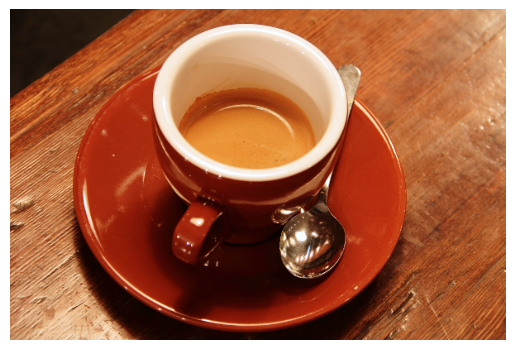

In [2]:
x = skimage.data.coffee()
m,n,d = x.shape
plt.imshow(x)
plt.axis('off')
plt.show()

The figure is a color image and as such is described by three different matrices, one for each color channel. The shape of the image in fact is $(400,600,3)$.

In [3]:
print(x.shape)

(400, 600, 3)


To manage color images in the following snippet I split the describing matrix in three distinct matrices for the three color channels. Below I show the plots of the distinct matrices with `matplotlib.pyplot`.

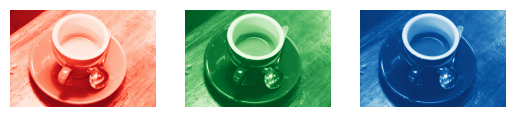

In [4]:
red_channel = x[:, :, 0]
green_channel = x[:, :, 1]
blue_channel = x[:, :, 2]

plt.subplot(1,3,1)
plt.imshow(red_channel, cmap='Reds_r')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(green_channel, cmap='Greens_r')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(blue_channel, cmap='Blues_r')
plt.axis('off')
plt.show()

I now compute the SVD decomposition separately for each of the three matrices.

In [5]:
U_r, s_r, VT_r = np.linalg.svd(red_channel, full_matrices=True)
U_g, s_g, VT_g = np.linalg.svd(green_channel, full_matrices=True)
U_b, s_b, VT_b = np.linalg.svd(blue_channel, full_matrices=True)

print(U_r.shape, s_r.shape, VT_r.shape)

(400, 400) (400,) (600, 600)


The following task is to visualize some dyads of the three matrices. I do it for $i \in \{1,5,9,13\}$, and from the output of the code it can be seen that none of the dyads alone is informative enough to be able to remotely describe the image. In fact the information that the image is a coffee is completely lost. 

However it is evident, that the more we increase $i$ the worse the plot of the dyad is. From the first dyad the light and dark zones can be guessed and the outline of the cup can be inferred. This is a conseguence of the fact that the singular values are ordered in a decreasing order and each singular value encodes the importance of the dyad in the construction of the matrix, i.e. the original image.

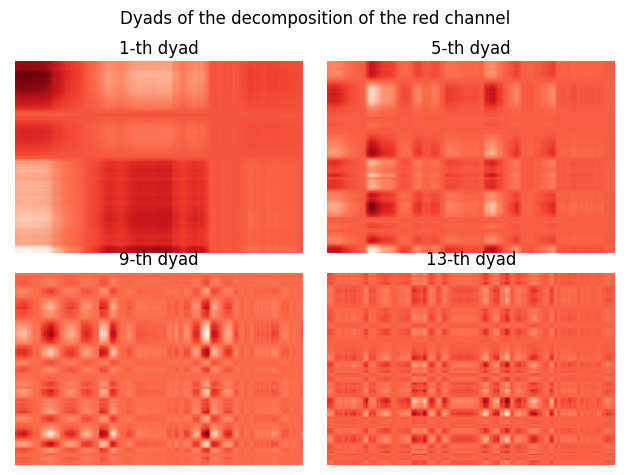

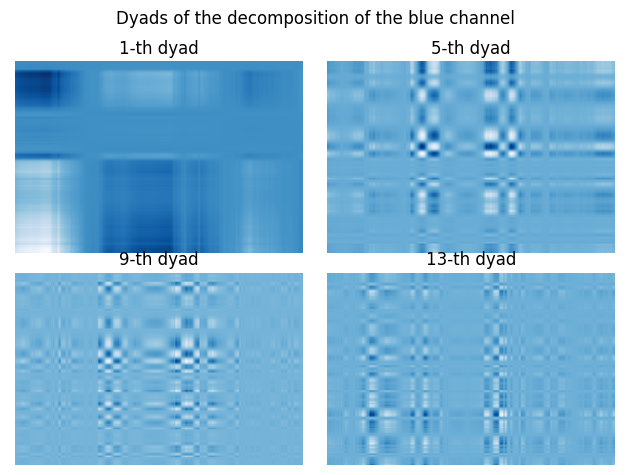

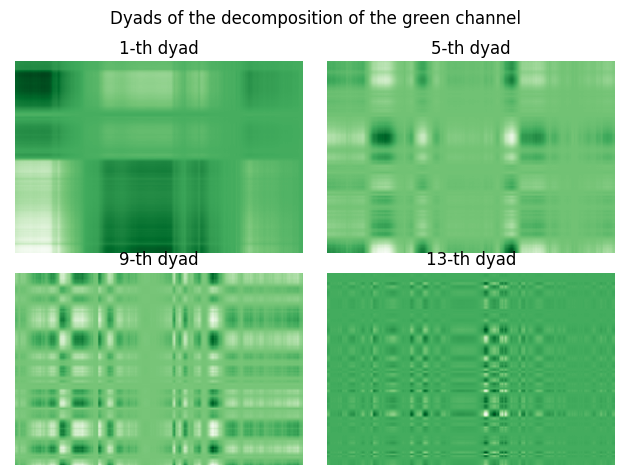

In [ ]:
def visualize_dyads_r(U, s, VT):
    k = 1
    plt.figure()
    plt.axis('off')
    plt.suptitle('Dyads of the decomposition of the red channel')
    for i in range(1,14,4):
        dyad = s[i] * np.outer(U[:,i], VT[i, :])
        plt.subplot(2,2,k)
        plt.title(f'{i}-th dyad')
        plt.imshow(dyad, cmap='Reds_r')
        plt.axis('off')
        k += 1
    plt.tight_layout()
    plt.show()

def visualize_dyads_b(U, s, VT):
    k = 1
    plt.figure()
    plt.axis('off')
    plt.suptitle('Dyads of the decomposition of the blue channel')
    for i in range(1,14,4):
        dyad = s[i] * np.outer(U[:,i], VT[i, :])
        plt.subplot(2,2,k)
        plt.title(f'{i}-th dyad')
        plt.imshow(dyad, cmap='Blues_r')
        plt.axis('off')
        k += 1
    plt.tight_layout()
    plt.show()

def visualize_dyads_g(U, s, VT):
    k = 1
    plt.figure()
    plt.axis('off')
    plt.suptitle('Dyads of the decomposition of the green channel')
    for i in range(1,14,4):
        dyad = s[i] * np.outer(U[:,i], VT[i, :])
        plt.subplot(2,2,k)
        plt.title(f'{i}-th dyad')
        plt.imshow(dyad, cmap='Greens_r')
        plt.axis('off')
        k += 1
    plt.tight_layout()
    plt.show()

visualize_dyads_r(U_r, s_r, VT_r)   
visualize_dyads_b(U_b, s_b, VT_b)
visualize_dyads_g(U_g, s_g, VT_g)

In the following code the previous procedure is repeated with the only change that this time the dyads of the original RGB matrix are considered.

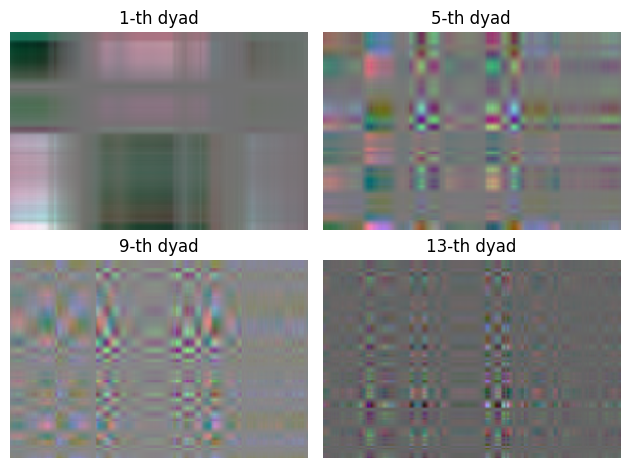

In [7]:
def visualize_dyads(Us, Sigmas, VTs):

    k = 1
    plt.figure()
    plt.axis('off')

    for i in range(1,14,4):
        dyad_r = Sigmas[0][i] * np.outer(Us[0][:,i], VTs[0][i, :])
        dyad_g = Sigmas[1][i] * np.outer(Us[1][:,i], VTs[1][i, :])
        dyad_b = Sigmas[2][i] * np.outer(Us[2][:,i], VTs[2][i, :])
        dyad = np.stack((dyad_r, dyad_g, dyad_b), axis=2)
        dyad = (dyad - dyad.min()) / (dyad.max() - dyad.min())
        plt.subplot(2,2,k)
        plt.imshow(dyad)
        plt.title(f'{i}-th dyad')
        plt.axis('off')
        k += 1
        
    plt.tight_layout()
    plt.show()

visualize_dyads([U_r, U_b, U_g], [s_r, s_b, s_g], [VT_r, VT_b, VT_g])

I now plot the singular values of the matrices representing different channels.

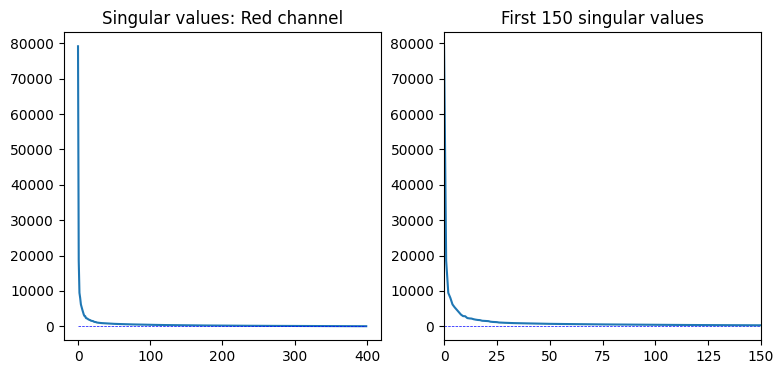

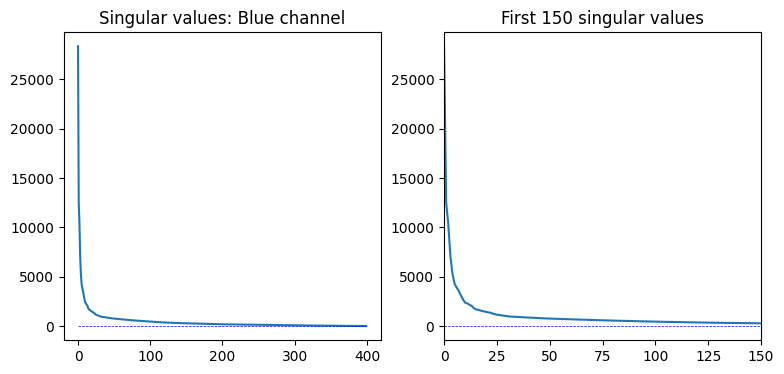

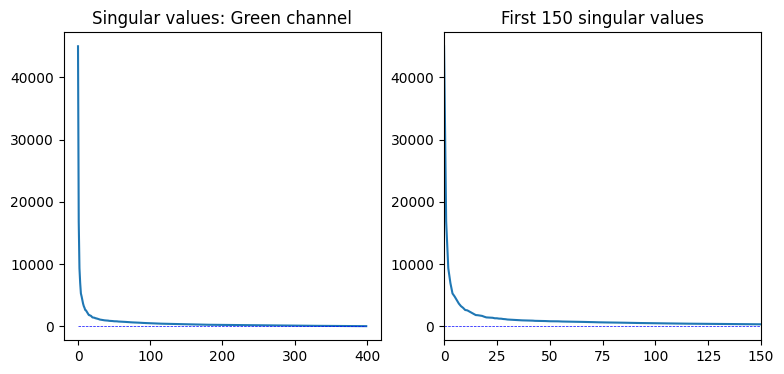

In [8]:
def plot_singular_values(s, channel):
    plt.figure(figsize=(9,4))
    plt.subplot(1,2,1)
    plt.title(f'Singular values: {channel}')
    plt.plot(s)
    plt.hlines(y=0, xmin=0, xmax=len(s)-1, color='blue', linestyle='--', lw=0.5, label='y=0') 

    plt.subplot(1,2,2)
    plt.title('First 150 singular values')
    plt.xlim((0,150))
    plt.axhline(y=0, color='blue', linestyle='--', lw=0.5, label='y=0')
    plt.plot(s)
    plt.show()

plot_singular_values(s_r, 'Red channel')
plot_singular_values(s_b, 'Blue channel')
plot_singular_values(s_g, 'Green channel')

From the figures can be seen that the singular values of all the matrices have a very fast drop down in the first indexes and are then slowly decreasing up to the $400th$.

From the subplots on the right, where I focus only on the first $150$ singular values it jumps out that after index $25$ the decrease becomes a lot more gradual. Nevertheless the singular values at that point are still very high for all three channels as shown below.

In [9]:
print(s_r[25])
print(s_g[25])
print(s_b[25])

1172.6884495031775
1285.856373946394
1164.3899112790027


In the following code I visualize the $k$-rank approximation of the original color image, for different values of $k$, in particular $k \in \{5,15,25,35,45,55\}$  by computing the $k$-rank approximation for each color channel and then merging the three matrices in one with shape $(400,600,3)$. 

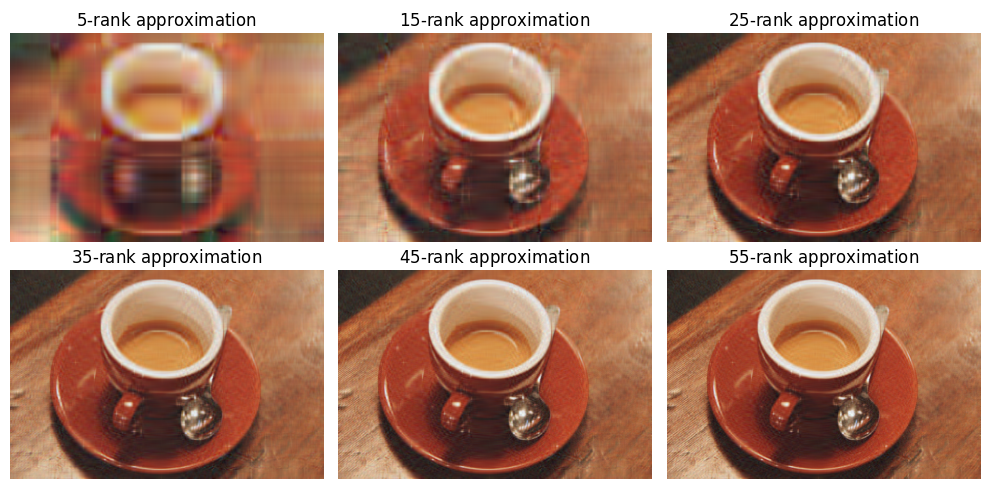

In [10]:
import math

#Returns a list of k-approximators (k-start / step)
def k_rank_one_mat(U, s, VT,start_k, end_k, step):
    S = np.zeros((400,600))
    np.fill_diagonal(S, s)
    k_approximates = []
    for k in range(start_k,end_k,step):
        k_app = U[:,:k] @ S[:k,:k] @ VT[:k,:]
        k_approximates.append(k_app) 
    return k_approximates

def k_rank_visual(Us, ss, VTs, start_k, end_k, step):
    reds = k_rank_one_mat(Us[0], ss[0], VTs[0], start_k, end_k, step)
    blues = k_rank_one_mat(Us[1], ss[1], VTs[1], start_k, end_k, step)
    greens = k_rank_one_mat(Us[2], ss[2], VTs[2], start_k, end_k, step)
    plt.figure(figsize=(10,5))
    for i in range(math.ceil((end_k-start_k) / step)):
        k_app = np.stack((reds[i], greens[i], blues[i]), axis=2)
        k_app = (k_app - k_app.min()) / (k_app.max() - k_app.min())
        plt.subplot(2,3,i+1)
        plt.title(f'${i*step + start_k}$-rank approximation')
        plt.axis('off')
        plt.imshow(k_app)
    plt.tight_layout()
    plt.show()

k_rank_visual([U_r, U_b, U_g], [s_r, s_b, s_g], [VT_r, VT_b, VT_g],5,56,10)


It can be seen that the compressed images become better and better when increasing the value of $k$, but once going over $k=25$ the image quality is not improving at the same rate as before. However the image is still a pretty rough approximation, because the neglected singular values still have a high value.

The same is done in the following, with the only difference that here I consider each different channel separately.

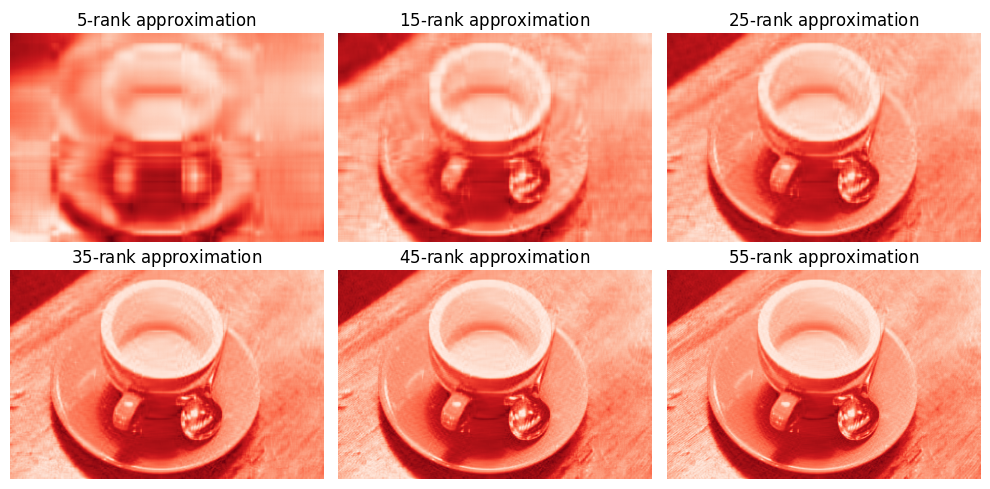

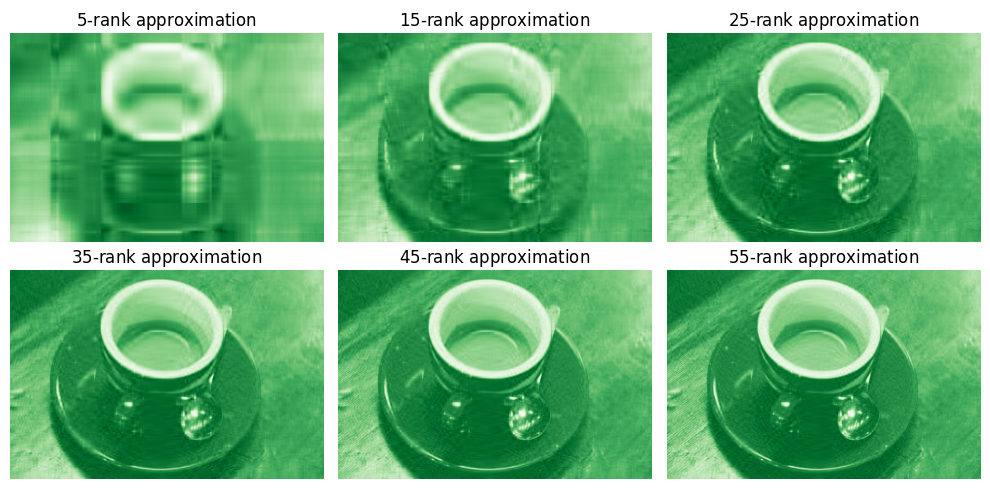

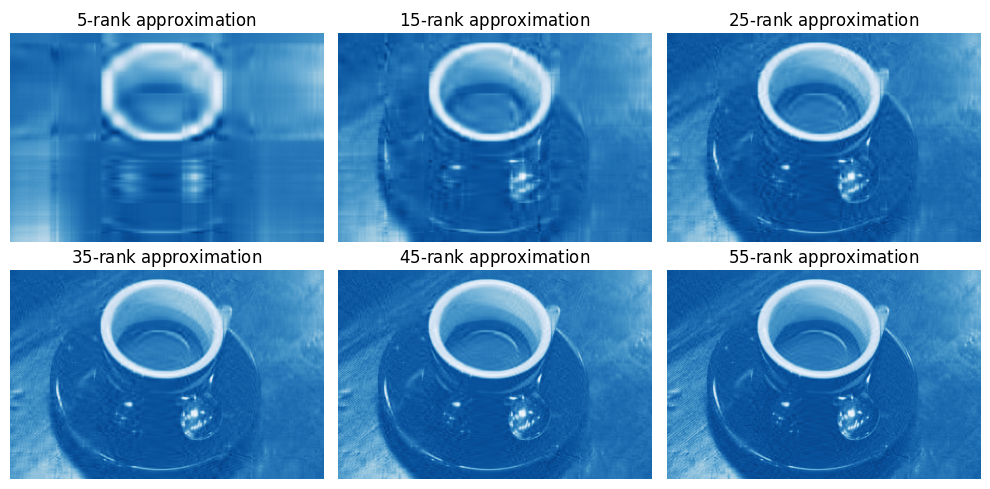

In [11]:
def k_rank_visual(Us, ss, VTs, start_k, end_k, step, color):
    k_aps = k_rank_one_mat(Us[0], ss[0], VTs[0], start_k, end_k, step)
    plt.figure(figsize=(10,5))
    for i in range(math.ceil((end_k-start_k) / step)):
        k_app = k_aps[i]
        plt.subplot(2,3,i+1)
        plt.title(f'${i*step + start_k}$-rank approximation')
        plt.axis('off')
        plt.imshow(k_app, cmap=color)
    plt.tight_layout()
    plt.show()

k_rank_visual([U_r], [s_r], [VT_r],5,56,10, 'Reds_r')
k_rank_visual([U_g], [s_g], [VT_g],5,56,10, 'Greens_r')
k_rank_visual([U_b], [s_b], [VT_b],5,56,10, 'Blues_r')

I will now compute and plot the approximation error as a function of $k$, which as expected decreases with increasing $k$. I also consider the relative approximation score to capture how much of the initial information is retained by the approximation and to ensure the measure is independent of scale, resulting in a more interpretable metric:
$$   \text{Relative Score} = 1 - \frac{\| X  - X_k\|_F}{\| X \|_F}.$$

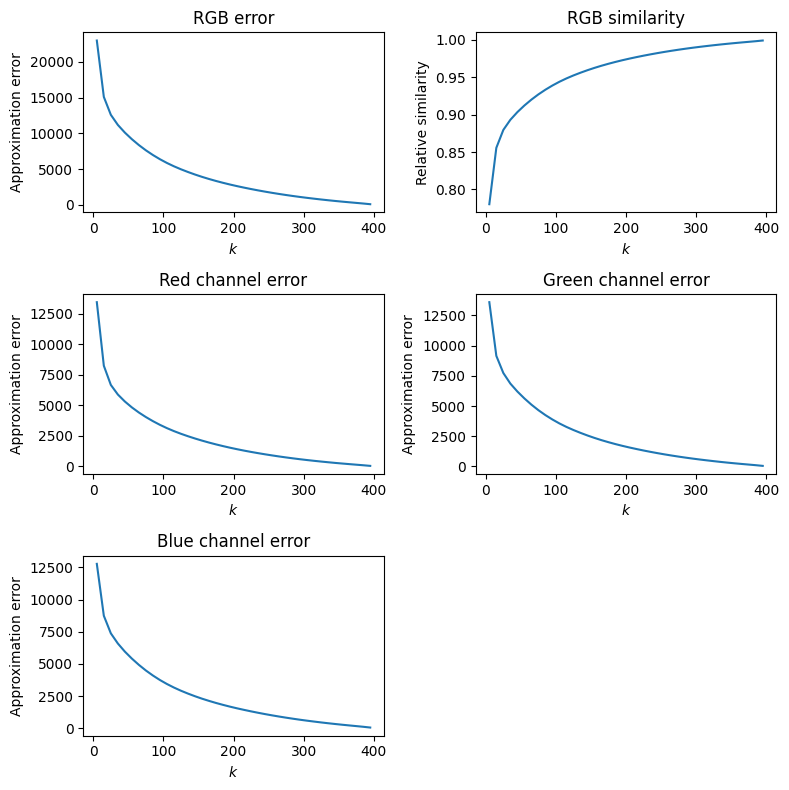

In [12]:
def k_rank_compute(Us, ss, VTs, start_k,  end_k, step):
    reds = k_rank_one_mat(Us[0], ss[0], VTs[0], start_k, end_k, step)
    blues = k_rank_one_mat(Us[1], ss[1], VTs[1], start_k, end_k, step)
    greens = k_rank_one_mat(Us[2], ss[2], VTs[2], start_k, end_k, step)
    k_approximates = []
    for i in range(math.ceil((end_k-start_k) / step)):
        k_app = np.stack((reds[i], greens[i], blues[i]), axis=2)
        k_approximates.append(k_app)
    return k_approximates, reds, blues, greens

def compute_plot_error (x, Us, ss, VTs, start_k, end_k, step):
    k_approximates, reds, blues, greens = k_rank_compute(Us, ss, VTs, start_k, end_k, step)
    relatives_RGB = []
    errors_RGB = []
    errors_R = []
    errors_G = []
    errors_B = []
    for i in range(math.ceil((end_k-start_k) / step)):
        error = np.linalg.norm(x - k_approximates[i])
        errors_RGB.append(error)
        errors_R.append(np.linalg.norm(red_channel - reds[i]))
        errors_G.append(np.linalg.norm(green_channel - greens[i]))
        errors_B.append(np.linalg.norm(blue_channel - blues[i]))
        relative = 1 - (error / (np.linalg.norm(x)))
        relatives_RGB.append(relative)
    plt.figure(figsize=(8,8))
    plt.subplot(3,2,1)
    plt.plot([i for i in range(start_k, end_k, step)], errors_RGB)
    plt.title('RGB error')
    plt.ylabel('Approximation error')
    plt.xlabel('$k$')
    plt.subplot(3,2,2)
    plt.plot([i for i in range(start_k, end_k, step)], relatives_RGB)
    plt.title('RGB similarity')
    plt.ylabel('Relative similarity')
    plt.xlabel('$k$')
    plt.subplot(3,2,3)
    plt.plot([i for i in range(start_k, end_k, step)], errors_R)
    plt.title('Red channel error')
    plt.ylabel('Approximation error')
    plt.xlabel('$k$')
    plt.subplot(3,2,4)
    plt.plot([i for i in range(start_k, end_k, step)], errors_G)
    plt.title('Green channel error')
    plt.ylabel('Approximation error')
    plt.xlabel('$k$')
    plt.subplot(3,2,5)
    plt.plot([i for i in range(start_k, end_k, step)], errors_B)
    plt.title('Blue channel error')
    plt.ylabel('Approximation error')
    plt.xlabel('$k$')
    plt.tight_layout()
    plt.show()

compute_plot_error(x, [U_r, U_b, U_g], [s_r, s_b, s_g], [VT_r, VT_b, VT_g],5,400,10)

From these plots I can observe the characteristic behavior of the relative score, that improves greatly in the first increases of $k$ and then assumes a more gradual growth.

In the following code I will compute and visualize the compression factor for increasing values of $k$. As was to be expected from the definition the plot is linearly decreasing.

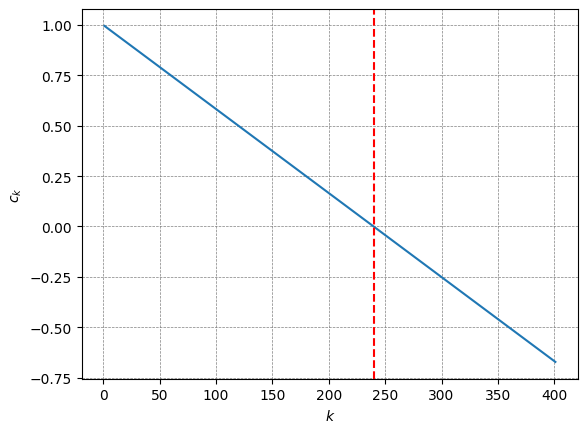

The value of k for which the compression factor is the closest to 0 is 240.
The approximation error for k=240 is 1934.84.
The relative similarity for k=240 is 0.98.


In [13]:
def plot_compression_factor(ks, m, n, k_not_compressed):
    compressions = []
    for i in ks:
        compressions.append(1-((i*(m+n+1))/(m*n)))
    plt.figure()
    plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('$k$')
    plt.ylabel('$c_k$')
    plt.plot(ks,compressions, label='Compression factor $c_k$')
    plt.axvline(x=k_not_compressed, color='r', linestyle='--', label=f'$k = {k_not_compressed}$ (where $c_k \\approx 0$)')
    plt.show()

k_not_compressed = (m * n) / (m+n+1)
int_not_compressed = round(k_not_compressed)

plot_compression_factor([i for i in range(1, 402, 50)], m, n, k_not_compressed)
print(f"The value of k for which the compression factor is the closest to 0 is {int_not_compressed}.")

approx, _, _, _ = k_rank_compute([U_r, U_b, U_g], [s_r, s_b, s_g], [VT_r, VT_b, VT_g],int_not_compressed,int_not_compressed+1,1)
error = np.linalg.norm(x - approx)
print(f"The approximation error for k={int_not_compressed} is {round(error,2)}.")

relative = 1 - (error / (np.linalg.norm(x.flatten(), 2)))
print(f"The relative similarity for k={int_not_compressed} is {round(relative,2)}.")

## Classification of MNIST Digits

### Binary classification
In the following I load the dataset into a pandas DataFrame and I obtain a matrix $X$ and the vector $Y$, after transforming it into a numpy Ndarray.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

digits = pd.read_csv('train.csv')
digits = np.array(digits)

X = digits[:,1:]
X = X.T

print(X.shape)

Y = digits[:,0]
print(Y.shape)


(784, 42000)
(42000,)


The code snippet below visualizes an image of the dataset and its associated label in $Y$.

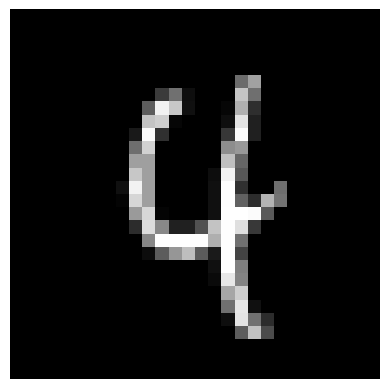

The digit in the image is: 4.


In [15]:
def visualize_image(idx):
    row = X[:,idx]
    img = row.reshape((28,28))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()
    print(f'The digit in the image is: {Y[idx]}.')
   
r_ind = random.randint(0,X.shape[1] - 1)
visualize_image(r_ind)

Now I obtain two new datasets, considering only the observations labeled as digits $3$ and $4$. By looking at the shape of the obtained dataset we can see that there are $8423$ images of digits $3$ and $4$.

In [16]:
X_c1_c2 = X[:,(Y == 3) | (Y == 4)]
Y_c1_c2 = Y[(Y == 3) | (Y == 4)]
X_c1_c2.shape

(784, 8423)

In the following the code for splitting the dataset into test and train set is written.

In [17]:
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X_c1_c2, Y_c1_c2, int((8/10)*X_c1_c2.shape[1]))

I now compute the SVD decomposition for the two matrices that contain respectively the flattened images of digits $3$ and $4$. I also compute the distance of an observation extracted from the test set and its projection on $U1$ and $U2$ and classify the new digit based on the distance of the projection. 

In [18]:
X1 = Xtrain[:,(Ytrain == 3)]
X2 = Xtrain[:,(Ytrain == 4)]

U1, x1_s, x1_VT = np.linalg.svd(X1, full_matrices=False)
U2, x2_s, x2_VT = np.linalg.svd(X2, full_matrices=False)

x_ukn = Xtest[:,8]
x_proj_X1 = U1 @ (U1.T @ x_ukn)
x_proj_X2 = U2 @ (U2.T @ x_ukn)

d1 = np.linalg.norm(x_ukn - x_proj_X1, 2)
d2 = np.linalg.norm(x_ukn - x_proj_X2, 2)

if (d1 < d2):
    print('The predicted digit is: 3.')
else:
    print('The predicted digit is: 4.')
print(f'The true digit is: {Ytest[8]}.')



The predicted digit is: 4.
The true digit is: 4.


In the next snippet I repeat the experiment for the observations of the test set and I compute the classification error of the classifier. In this function the digits I want to classify between are considered as parameters, and I invoke it with `dig1`=$3$ and `dig2`=$4$. I repeat the whole evaluation $10$ times, with different train and test sets at each iteration, in order to obtain a more robust evaluation. The return value is the misclassification rate , defined as
$$MR = \frac{1}{N_{test}}\sum_{i=1}^{N_{\text{test}}} 1(f(x^i) ==  y^i).$$

In [19]:
def evaluate_alg(X, Y, dig1, dig2):
    X_class = X[:,(Y == dig1) | (Y == dig2)]
    Y_class = Y[(Y == dig1) | (Y == dig2)]
    errors = []
    for i in range(10):
        wrong_class = 0
        (Xtrain, Ytrain), (Xtest, Ytest) = split_data(X_class, Y_class, int((4/5) * X_class.shape[1]))
        X1 = Xtrain[:,(Ytrain == dig1)]
        X2 = Xtrain[:,(Ytrain == dig2)]
        U1, x1_s, x1_VT = np.linalg.svd(X1, full_matrices=False)
        U2, x2_s, x2_VT = np.linalg.svd(X2, full_matrices=False)
        for j in range(Xtest.shape[1]):
            x_sel = Xtest[:,j]
            x_proj_X1 = U1 @ (U1.T @ x_sel)
            x_proj_X2 = U2 @ (U2.T @ x_sel)
            d1 = np.linalg.norm(x_sel - x_proj_X1, 2)
            d2 = np.linalg.norm(x_sel - x_proj_X2, 2)
            if (d1 < d2) and (Ytest[j] != dig1):
                wrong_class += 1
            elif (d1 > d2) and (Ytest[j] != dig2):
                wrong_class += 1
        errors.append((wrong_class / Xtest.shape[1]))        
    return round(np.mean(errors) * 100, 2)

error = evaluate_alg(X, Y, 3, 4)
print(f"The classification error of the algorithm is {error}%.")

The classification error of the algorithm is 7.0%.


The next interesting property of the classifier to analyze is how does the structural-visual similarity between digits affect the classification error. For doing this I have to determine which are the most and less similar digits in our dataset. This idea is implemented in the code snippet below.

I define the disimilarity as the Euclidean norm of the difference between means of the two matrices each representing the images of the two considered digits.

In [20]:
import itertools

def find_most_less_similar(X, Y):
    
    combinations = list(itertools.combinations(range(10), 2))
    closest = float('inf')
    furthest = float('-inf')
    most_similar = 0
    least_similar = 0

    for combination in combinations:

        X1 = X[:, (Y == combination[0])]
        X2 = X[:, (Y == combination[1])]
        curr = np.linalg.norm(X1.mean(1) - X2.mean(1))

        if curr < closest:
            most_similar = combination
            closest = curr
        if curr > furthest:
            least_similar = combination
            furthest = curr

    return most_similar, least_similar

most_similar, least_similar = find_most_less_similar(X,Y)
print(f'The most similar digits are: {most_similar}. \nThe least similar digits are {least_similar}.')

The most similar digits are: (4, 9). 
The least similar digits are (0, 1).


In the following code I explore how does visual similarity impact the performance of the algorithm. The error rate is measured between the most and least similar digits. 

In [21]:
dig1, dig2 = least_similar
dig3, dig4 = most_similar
error1 = evaluate_alg(X, Y, dig1, dig2)
error2 = evaluate_alg(X, Y, dig3, dig4)
print(f'The error of the algorithm considering the least similar digits {dig1} and {dig2} is {error1}%.')
print(f'The error of the algorithm considering the most similar digits {dig3} and {dig4} is {error2}%.')

The error of the algorithm considering the least similar digits 0 and 1 is 1.41%.
The error of the algorithm considering the most similar digits 4 and 9 is 24.47%.


The results show that the algortithm is much better in classifying between digits that are visually different. 

This can be explained by considering that two matrices $X_1$ and $X_2$ that represent the observations of two visualy different digits are more different with respect to two matrices representing similar digits. This translates to the fact that the subspaces  defined by $U1$ and $U2$ are more dissimilar. This means that when projecting a new unseen observation, on the two subspaces the resulting projections will differ more significantly and so the distances between the original vector and its projections will likely be more different ensuring a better and more confident classification. 

On the other hand when digits are similar also the two spaces $X1$ and $X2$ are similar, therefore also the distance to the projections of an unknown observation on the induced spaces by SVD, will be more similar. This results in worse performances of the algorithm.

### Multiclass classification

In the next snippet I repeat the experiment, this time considering the task of multiclass classification. 

In [22]:
def compute_distance(U, x_ukn):
    x_proj = U @ (U.T @ x_ukn)
    return (np.linalg.norm(x_ukn - x_proj, 2))

def evaluate(X, Y, digits):
    alg_errors = []
    for i in range(10):
        (Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, int((4/5) * X.shape[1]))
        Us = []
        for digit in digits:
            X_dig = Xtrain[:, Ytrain == digit]
            U, s, VT = np.linalg.svd(X_dig, full_matrices=False)
            Us.append(U)
        missclass = 0
        for j in range(Xtest.shape[1]):
            x_ukn = Xtest[:,j]
            distances = []
            for u in Us:
                distances.append(compute_distance(u, x_ukn=x_ukn))
            min_index = np.argmin(distances)
            if digits[min_index] != Ytest[j]:
                missclass += 1
        alg_errors.append(missclass / Xtest.shape[1])
    return round(np.mean(alg_errors)*100, 2)

def multiclass_class(X, Y, digits):
    all_classes = []
    all_targets = []
    for dig in digits:
        all_classes.append(X[:,Y == dig])
        all_targets.append(Y[Y==dig])
    X_classes = np.concatenate(all_classes, axis=1)
    Y_classes = np.concatenate(all_targets)
    error = evaluate(X_classes, Y_classes, digits)
    return error

digs1 = (4,9)
digs2 = (4,9,1)
err1 = multiclass_class(X,Y, digs1)
err2 = multiclass_class(X, Y, digs2)

print(f"The error of the algorithm when classifying between {digs1} is {err1}%.")
print(f"The error of the algorithm when classifying between {digs2} is {err2}%.")

The error of the algorithm when classifying between (4, 9) is 24.52%.
The error of the algorithm when classifying between (4, 9, 1) is 17.07%.


From the output can be observed that the misclassification rate of the algorithm does not depend on the number of digits we are classifying between as the classification error between $4$ and $9$ is worse than the $MR$ when classifying three digits $4,9,1$. The most impactful thing on the accuracy of the classification algorithm is the structural similarity between digits as discussed above. If I introduce another digit for classification that is structurally different from the previous two, like the $1$ I used, it's true that now the algorithm has to determine the closest distance from three projections instead of two. However the new subspace related to the added digit remains _distant_, if the digit is structurally different, potentially increasing the classification accuracy.

## Clustering with PCA


The previous pre-processing steps are repeated below, to obtain the datasets of the desired form.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

digits = pd.read_csv('train.csv')
digits = np.array(digits)

X = digits[:,1:]
X = X.T
Y = digits[:,0]
print(X.shape)
print(Y.shape)

(784, 42000)
(42000,)


In [24]:
dig1 = 0
dig2 = 6
dig3 = 9
X_classes = X[:,(Y == dig1) | (Y == dig2) | (Y == dig3)]
Y_classes = Y[(Y == dig1) | (Y == dig2) | (Y == dig3)]

def split_data(X, Y, Ntrain):
    d, N = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)
    
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

(X_train, Y_train), (X_test, Y_test) = split_data(X_classes, Y_classes, int((8/10)*X_classes.shape[1]))


In the following the considered train set is visualized in the $2D$ and $3D$ space. The projection of the dataset from a $784$-dimensional space to a $2/3$-dimensional space is done by implementing the PCA algorithm on the train set. The red crosses in the plot represent the centroids of each cluster, one for each digit.

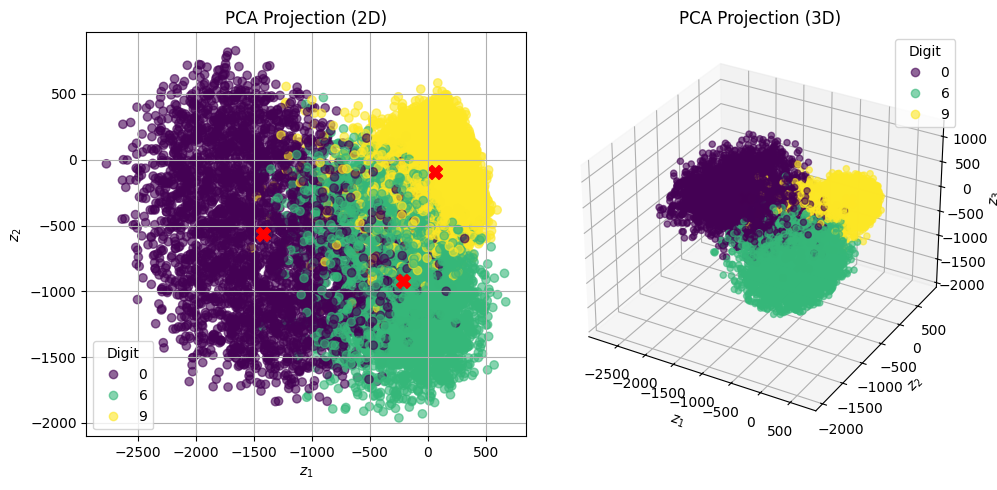

In [25]:
def comp_centroids(Zk, Y, digs):
    centroids = []
    for i in digs:
        Zk_cluster = Zk[:, Y == i]  
        centroid = np.mean(Zk_cluster, axis=1)  
        centroids.append(centroid)
    return np.array(centroids) 

def PCA(X, k):
    cX = np.mean(X, axis=1).reshape((X.shape[0], 1))  
    Xc = X - cX
    U, s, VT = np.linalg.svd(Xc, full_matrices=False)
    P = U[:, :k].T
    Zk = P @ X
    return Zk, P

def plot_clusters(ax, X, Y, k, digs):
    Zk, _ = PCA(X, k)
    
    scatter = ax.scatter(Zk[0, :], Zk[1, :], c=Y, cmap='viridis', alpha=0.6)

    centroids = comp_centroids(Zk, Y, digs)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

    ax.set_xlabel(r"$z_1$")
    ax.set_ylabel(r"$z_2$")
    ax.set_title("PCA Projection (2D)")
    ax.legend(*scatter.legend_elements(), title="Digit")
    ax.grid(True)

def plot_clusters_3d(ax, X, Y, k, digs):
    Zk, _ = PCA(X, k)

    scatter = ax.scatter(Zk[0, :], Zk[1, :], Zk[2, :], c=Y, cmap='viridis', alpha=0.6)

    centroids = comp_centroids(Zk, Y, digs)
    for centroid in centroids:
        ax.scatter(centroid[0], centroid[1], centroid[2], c='red', marker='X', s=100)

    ax.set_xlabel(r"$z_1$")
    ax.set_ylabel(r"$z_2$")
    ax.set_zlabel(r"$z_3$")
    ax.set_title("PCA Projection (3D)")
    ax.legend(*scatter.legend_elements(), title="Digit")

def plot_pca(X, Y, digs):
    fig = plt.figure(figsize=(10, 5))

    ax1 = fig.add_subplot(1, 2, 1)  
    plot_clusters(ax1, X, Y, 2, digs)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    plot_clusters_3d(ax2, X, Y, 3, digs)

    plt.tight_layout()  
    plt.show()

digs = [0, 6, 9]
plot_pca(X_train, Y_train, digs)

In the following I will define a function that computes the average distance of the observations of each cluster from its centroid. 

In [26]:
def average_dist(Zk, Y, digs, k):
    centroids = comp_centroids(Zk, Y, digs)
    for i in range(len(centroids)):
        cluster = Zk[:,Y == digs[i]]
        mean_dist = np.mean(np.linalg.norm(cluster.T - centroids[i], 2, axis=1))
        print(f'The average distance for the cluster {digs[i]} is: {round(mean_dist, 2)}.')

average_dist(PCA(X_train, 2)[0], Y_train, digs, 2)

The average distance for the cluster 0 is: 733.28.
The average distance for the cluster 6 is: 536.2.
The average distance for the cluster 9 is: 359.23.


The computed distances confirm the intuition given by the upper figure, as the cluster of the digit $9$ is the most dense one, while the cluster of $0$ is the most spread out one, with the greatest mean distance.

The computed distances measure how effective the PCA is on capturing the directions with the most variance in the dataset and hence the cluster's structure -> small average distance means that the projection retains the structure of the images well.

I repeat now the same procedure, but considering the test set. In particular I recompute the PCA on the train set and with the obtained projection matrix I project the test set on a lower dimensional space `Zk_test`. In the plot the projected space is visualized. Note that the centroids are computed on the projected train set. At the end the average distance of the projected test observations from the centroids, from the train set, is computed.

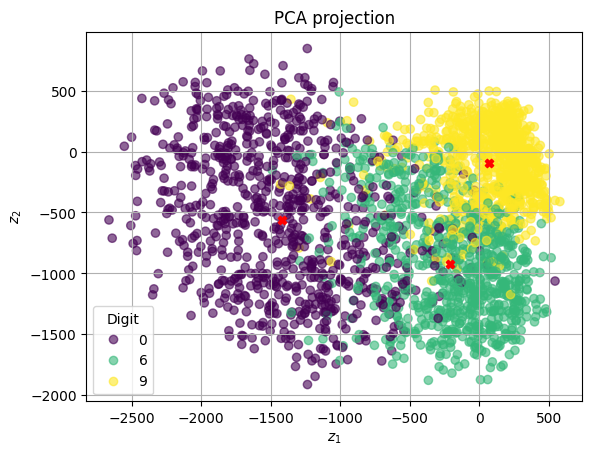

The average distance for the cluster 0 is: 720.8.
The average distance for the cluster 6 is: 536.25.
The average distance for the cluster 9 is: 364.48.


In [27]:
Zk_train, Proj_train = PCA(X_train, 2)
Zk_test = Proj_train @ X_test
ax = plt.scatter(Zk_test[0, :], Zk_test[1, :], c=Y_test, alpha=0.6)

centroids = comp_centroids(Zk_train, Y_train, digs)
plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], c='red', marker='X')   
plt.legend(*ax.legend_elements(), title="Digit")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection")
plt.grid()
plt.show()

for i in range(len(centroids)):
    cluster = Zk_test[:,Y_test == digs[i]]
    # cluster is of shape (2,831)
    mean_dist = np.mean(np.linalg.norm(cluster.T - centroids[i], 2, axis=1))
    print(f'The average distance for the cluster {digs[i]} is: {round(mean_dist, 2)}.')

From the results it seems that by applying the PCA on the test set the obtained results are very similar to applying it on the train set. This is reasonable, because the test data is representative of the train set and so the principal directions of variance captured in the train set characterize in a similar way also the observations in the test set. Meaning that the PCA projects the test observations in a similar way as the train ones.

In the following code I will define the classification algorithm based on the distance of the unknown observation from the centroid of each cluster. The proposed `eval_PCA` function computes the accuracy of the algorithm on the unseen observations of the test set. In order to obtain a more robust evaluation I repeated the process for $10$ times, as before in the SVD exercise. 

In [28]:
import random

def eval_PCA(X, Y, digs, k):

    # Create the dataset with only the considered digits
    all_classes = []
    all_targets = []
    for dig in digs:
        all_targets.append(Y[Y == dig])
        all_classes.append(X[:,Y == dig])
    X_classes = np.concatenate(all_classes, axis=1)
    Y_classes = np.concatenate(all_targets)
    
    scores = []
    for _ in range(10):
        (X_train, Y_train), (X_test, Y_test) = split_data(X_classes, Y_classes, int((7/10)*X_classes.shape[1]))
        res = PCA(X_train, k)
        Zk = res[0]
        Proj = res[1]
        centroids = comp_centroids(Zk, Y_train, digs)
        good_class = 0
        for i in range(X_test.shape[1] - 1):
            x_ukn = X_test[:,i]
            z_ukn = Proj @ x_ukn
            distances = []

            for centroid in centroids:
                distance = np.linalg.norm(centroid.flatten() - z_ukn, 2)
                distances.append(distance)
            min_ind = np.argmin(distances)
            if digs[min_ind] == Y_test[i]:
                good_class += 1
        scores.append(good_class / X_test.shape[1])
    return round(np.mean(scores) * 100, 2)

digs = [0, 6, 9]
print(f'The classification accuracy of the algorithm is: {eval_PCA(X, Y, digs, 2)}%.')


The classification accuracy of the algorithm is: 84.31%.


Now I call the previously defined testing procedure with different values for $k$ to better understand how does the dimension of the projected space affect the performance of the classification algorithm. 

In [29]:
for i in range(1,5):
    print(f'The classification accuracy of the algorithm for k = {i} is: {eval_PCA(X, Y, digs, i)}%.')

The classification accuracy of the algorithm for k = 1 is: 71.05%.
The classification accuracy of the algorithm for k = 2 is: 84.41%.
The classification accuracy of the algorithm for k = 3 is: 93.13%.
The classification accuracy of the algorithm for k = 4 is: 94.57%.


The code output confirms the intuition that the accuracy grows when increasing the value of $k$. In particular the increase in accuracy is larger for smaller values of $k$, which reflects the fact that the first principal components are the one that capture more variance in the dataset and so by adding them more information is retained in the projection. 

To explore better this fact below I try it with four digits, obtaining similar results.

In [30]:
digs = [0,3,6,9]
for i in range(1,6):
    print(f'The classification accuracy of the algorithm for k = {i} is: {eval_PCA(X, Y, digs, i)}%.')

The classification accuracy of the algorithm for k = 1 is: 55.63%.
The classification accuracy of the algorithm for k = 2 is: 81.32%.
The classification accuracy of the algorithm for k = 3 is: 83.6%.
The classification accuracy of the algorithm for k = 4 is: 91.34%.
The classification accuracy of the algorithm for k = 5 is: 91.72%.


Up untill now I have considered the classification between the same three digits, in particular $0$, $6$ and $9$. Now I consider different digits to investigate the influence of the visual similarity of the digits over the classification accuracy of the algorithm.

In [31]:
digits = [least_similar, most_similar, (0,1,5), (0,6,9)]
for digs in digits:
    print(f'The accuracy of the algorithm for k = {len(digs)} and digits = {digs} is: {eval_PCA(X, Y, digs, len(digs))}%.')

The accuracy of the algorithm for k = 2 and digits = (0, 1) is: 99.09%.
The accuracy of the algorithm for k = 2 and digits = (4, 9) is: 65.33%.
The accuracy of the algorithm for k = 3 and digits = (0, 1, 5) is: 88.56%.
The accuracy of the algorithm for k = 3 and digits = (0, 6, 9) is: 93.25%.


It can be seen that the algorithm is better when considering digits that are visually different rather than similar digits, as was true for SVD. This follows the idea that the projection matrix $P$ ($U^T$), maps element close in the $X$ space to close elements in $Z$ and because of this the data in $Z$ is more dense when considering similar digits. Therefore, an unknown observation has a higher chance to be near many centroids and not only the centroid of its own cluster. When digits are very different the observations mapped to the new space are likely very different, meaning that the centroids are far away and so the distances between the obseravtion and the centroids of other clusters grow bigger.

**SVD vs. PCA**

The following code snippet compares the performances of the two classification algorithms, defined in this homework, based on SVD and PCA. The comparison considers both the classification of two and three digits and as can be seen below in both cases the PCA algorithm performs better than the one relying on SVD. Apart from the case where the classification is done between similar digits, indicating that the PCA might be more sensitive to structural similarities between digits.

In [34]:
digits = [most_similar, least_similar, (0,6,9)] 
for digs in digits:
    print(f"The accuracy of SVD for digits = {digs} is: {round(100 - multiclass_class(X,Y, digs),2)}%.")
    print(f'The accuracy of PCA for k = {len(digs)} and digits = {digs} is: {eval_PCA(X, Y, digs, len(digs))}%.')

The accuracy of SVD for digits = (4, 9) is: 75.85%.
The accuracy of PCA for k = 2 and digits = (4, 9) is: 66.79%.
The accuracy of SVD for digits = (0, 1) is: 98.78%.
The accuracy of PCA for k = 2 and digits = (0, 1) is: 99.13%.
The accuracy of SVD for digits = (0, 6, 9) is: 84.84%.
The accuracy of PCA for k = 3 and digits = (0, 6, 9) is: 93.08%.
